## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Data_Analysis.ipynb', 'IRIS.csv']

## Importing the dataset

Link to dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [3]:
df = pd.read_csv("IRIS.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


There are 150 rows and 5 columns.
Out of which four are features - sepal_length, sepal_width, petal_length and peta_width.
Target variable is species

## Data Understanding

### Checking for null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in the dataset

### Checking for duplicated rows

In [6]:
df.duplicated().sum()

3

In [7]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are three duplicated records.

In [8]:
df = df.drop_duplicates(keep = 'first')

I decided to drop the duplicated rows because it did not disturb the balance in my opinion, as the numbers are very small.

### Collecting insights on the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


We have the data type of each column and the size of the dataset.

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We get the mean, standard deviation, minimum, maximum, count and quartiles for each feature.

In [11]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

As the species column is a categorical variable, we cannot caluclate the mean/median for the same. Instead we use value_counts to see the distribution over each class. Also, the counts suggest that the data is balanced.

In [12]:
df.mean()

sepal_length    5.856463
sepal_width     3.055782
petal_length    3.780272
petal_width     1.208844
dtype: float64

In [13]:
df.median()

sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

We can see that the mean and median of the each column does not vary much, suggesting that the values are in  near normal distribution.

In [14]:
df.skew()

sepal_length    0.292560
sepal_width     0.324351
petal_length   -0.293763
petal_width    -0.113479
dtype: float64

In [15]:
df.kurt()

sepal_length   -0.556956
sepal_width     0.246838
petal_length   -1.374462
petal_width    -1.317760
dtype: float64

The skewness as well as kutosis lie in at around zero for all columns, confirming the near normal distribution of the data.

In [16]:
print('Median sepal length of iris-setosa = {}'.format(df[df["species"]=="Iris-setosa"]["sepal_length"].median()))
print('Median sepal width of iris-setosa = {}'.format(df[df["species"]=="Iris-setosa"]["sepal_width"].median()))
print('Median petal length of iris-setosa = {}'.format(df[df["species"]=="Iris-setosa"]["petal_length"].median()))
print('Median petal width of iris-setosa = {}'.format(df[df["species"]=="Iris-setosa"]["petal_width"].median()))

Median sepal length of iris-setosa = 5.0
Median sepal width of iris-setosa = 3.4
Median petal length of iris-setosa = 1.5
Median petal width of iris-setosa = 0.2


In [17]:
print('Median sepal length of iris-versicolor = {}'.format(df[df["species"]=="Iris-versicolor"]["sepal_length"].median()))
print('Median sepal width of iris-versicolor = {}'.format(df[df["species"]=="Iris-versicolor"]["sepal_width"].median()))
print('Median petal length of iris-versicolor = {}'.format(df[df["species"]=="Iris-versicolor"]["petal_length"].median()))
print('Median petal width of iris-versicolor = {}'.format(df[df["species"]=="Iris-versicolor"]["petal_width"].median()))

Median sepal length of iris-versicolor = 5.9
Median sepal width of iris-versicolor = 2.8
Median petal length of iris-versicolor = 4.35
Median petal width of iris-versicolor = 1.3


In [18]:
print('Median sepal length of iris-virginica = {}'.format(df[df["species"]=="Iris-virginica"]["sepal_length"].median()))
print('Median sepal width of iris-virginica = {}'.format(df[df["species"]=="Iris-virginica"]["sepal_width"].median()))
print('Median petal length of iris-virginica = {}'.format(df[df["species"]=="Iris-virginica"]["petal_length"].median()))
print('Median petal width of iris-virginica = {}'.format(df[df["species"]=="Iris-virginica"]["petal_width"].median()))

Median sepal length of iris-virginica = 6.5
Median sepal width of iris-virginica = 3.0
Median petal length of iris-virginica = 5.6
Median petal width of iris-virginica = 2.0


The median values suggest that iris-virginica have larger petals and sepals than others, while iris-setosa have smaller petals and sepals than others. Iris-versicolor are somewhere in the middle. Altough, iris-setosa tend to have longer sepals.

## Data Visuzlization

In [19]:
features = list(df.columns)
del features[-1] #extracting names of all the features

### Checking for correlation between features

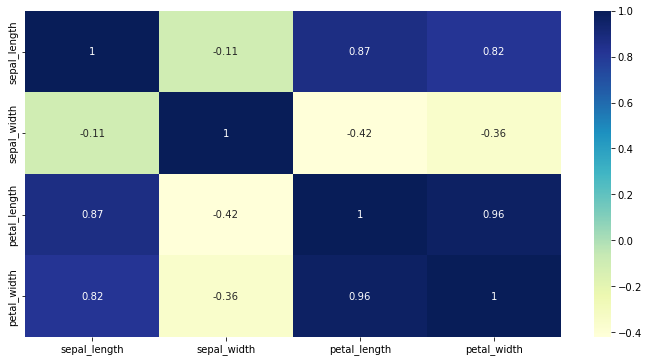

In [20]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True);

We can observe that petal length and petal width have a high correlation, petal width and sepal length have good correlation as well as petal length and sepal length.

### Checking realtion between featues with scatter plots

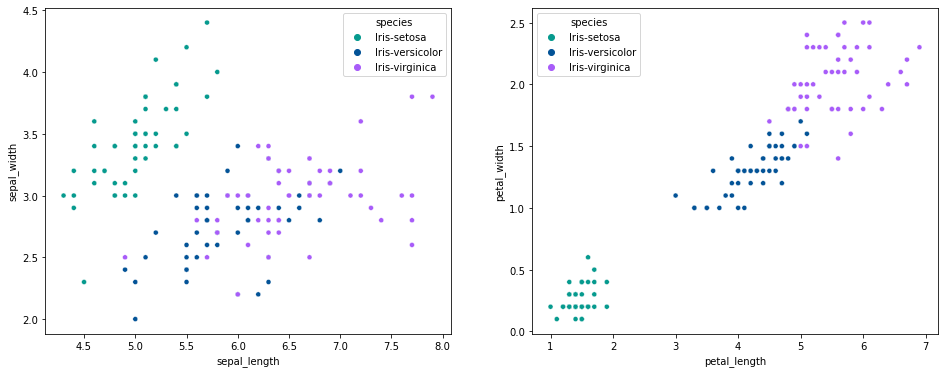

In [21]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(df['sepal_length'],
                df['sepal_width'],
                hue = df['species'],
                palette = ["#069A8E","#035397","#A85CF9"], 
                s= 25, ax = axes[0]);
sns.scatterplot(df['petal_length'],
                df['petal_width'],
                hue = df['species'],
                palette = ["#069A8E","#035397","#A85CF9"],
                s= 25, ax = axes[1]);
plt.show()

The first graph shows relation between sepal length and sepal width for each species. It is evident that overall, iris-verginica have larger sepals but iris-setosa have greater sepal length. Iris-versicolor are somewhere in the middle.

The first graph shows relation between petal length and petal width for each species. It is evident that overall, iris-verginica have larger petals and iris-setosa have smaller petals. Iris-versicolor are somewhere in the middle.

### Checking distribution of all features for each species

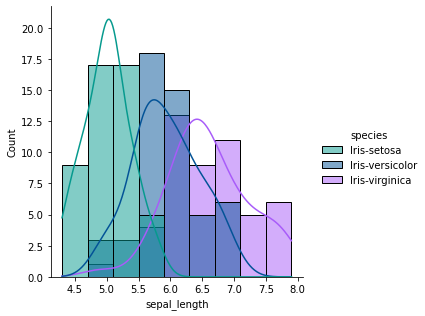

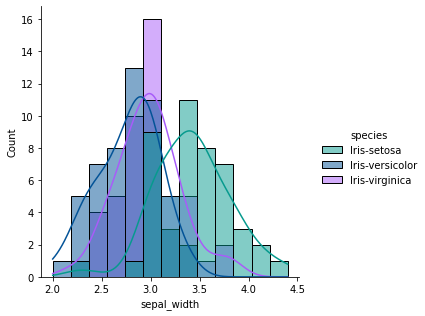

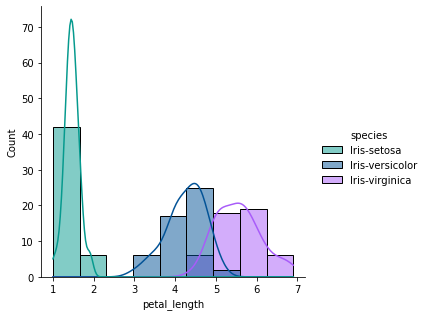

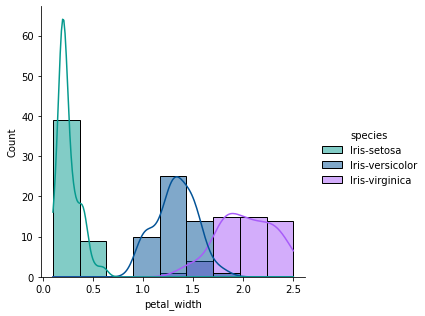

In [22]:
for feature in features:
    sns.displot(data=df, x=feature, hue='species', kind='hist', kde = True, fill=True,palette = ["#069A8E","#035397","#A85CF9"], height=4.5)

We can observe that iris-setosa is quite separable when it comes to petal features, while the others seems to overlap. It is difficult to separate the species on the basis of sepal features

### Outlier and quartile information

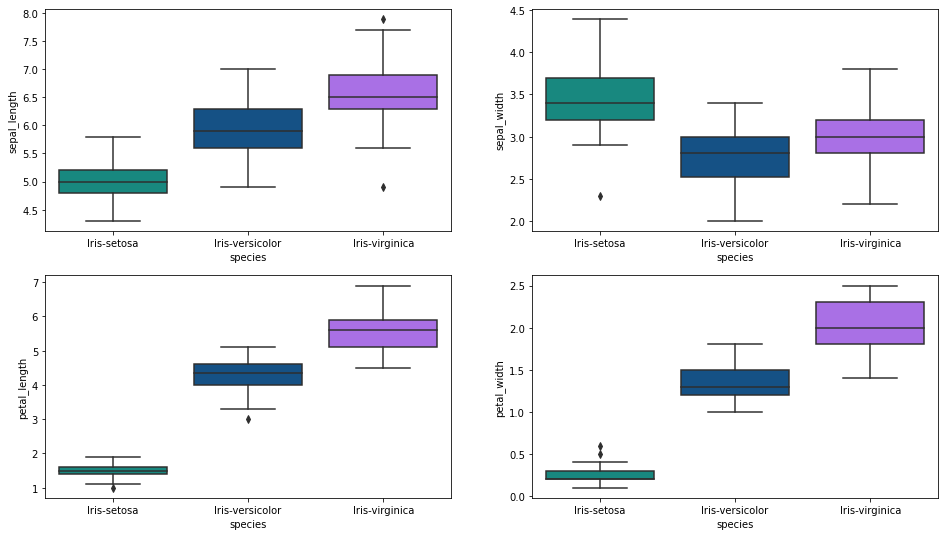

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
c = 0
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(y = features[c],
                    x = "species",
                    data = df,
                    palette = ["#069A8E","#035397","#A85CF9"],
                    orient ='v',
                    ax = axes[i,j])
        c+=1
        
plt.show()

The box plots describe that the setosa usually has smaller petals and sepals with few outliers. The Versicolor species is somewhere in the  middle. The virginica species has the largest petals and sepals as compared to others.

The median values are in cohenrence with as observed above.

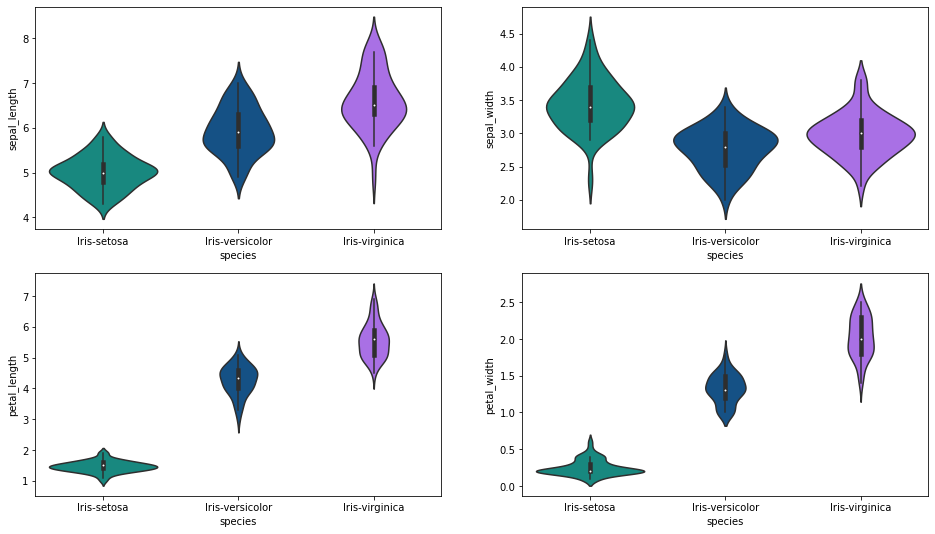

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
c=0
for i in range(0,2):
    for j in range(0,2):
        sns.violinplot(y=features[c],
                       x= "species",
                       data=df,
                       palette = ["#069A8E","#035397","#A85CF9"],
                       orient='v',
                       ax=axes[i,j])
        c+=1

plt.show()

The violin plots show the probabiltiy distribution of the features for each of the species. We can observe that except for sepal length and petal length of iris-setosa, all others exhibit some skewness or kurtosis.

For example, the distribution pof petal length in iris-versicolor is left skewed.